## Hypothesis 4:
by Travis Le
### Ha : Number of service requests increase by shelter-in-place
### Ho:  Number of service requests not increase by shelter-in-place

1. Case ID count by month of years


In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
from pprint import pprint


In [2]:
final_df = pd.read_csv("final_df.csv", low_memory=False)
final_df.head()

,Unnamed: 0,CaseID,Opened,Category,Request Type,Neighborhood,Latitude,Longitude,Source,Media URL,Opened Date,Opened Year,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,0,10395976,01/23/2019 01:34:53 PM,Sign Repair,Sign - Missing,Mission,37.764091,-122.413002,Web,NaN,01/23/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853
1,1,11886797,01/01/2020 09:06:00 PM,General Request - PUBLIC WORKS,request_for_service,Mission,37.764840,-122.415038,Web,NaN,01/01/2020,2020,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853
2,2,11089240,07/05/2019 03:12:37 PM,Graffiti,Graffiti on Building_other,Mission,37.755848,-122.414551,Integrated Agency,NaN,07/05/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853
3,3,11239390,08/07/2019 01:25:51 PM,Graffiti,Graffiti on Building_other,Mission,37.755703,-122.416397,Integrated Agency,NaN,08/07/2019,2019,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853
4,4,11886078,01/01/2020 03:27:00 PM,Street and Sidewalk Cleaning,General Cleaning,Mission,37.769532,-122.415847,Mobile/Open311,http://mobile311.sfgov.org/reports/11886078/ph...,01/01/2020,2020,94110,73737.0,36.6,109747.0,59660.0,7321.0,9.92853


### Analysis Start from this point

In [3]:
# final_df.count()

In [4]:
# Add column Opened Month to get month of the year
final_df['Opened Month'] = final_df['Opened Date'].str.slice(start = 0, stop=2 ).astype(int)
final_df['Opened Month']

0          1
1          1
2          7
3          8
4          1
          ..
1873838    9
1873839    9
1873840    9
1873841    9
1873842    9
Name: Opened Month, Length: 1873843, dtype: int32

In [5]:
# Count of March's activities of each year to see the changes in mumber actitivies
march_2017 = final_df[ (final_df['Opened Month'] == 3) &  (final_df['Opened Year'].astype(int) == 2017) ]
march_2018 = final_df[ (final_df['Opened Month'] == 3) &  (final_df['Opened Year'].astype(int) == 2018) ]
march_2019 = final_df[ (final_df['Opened Month'] == 3) &  (final_df['Opened Year'].astype(int) == 2019) ]
march_2020 = final_df[ (final_df['Opened Month'] == 3) &  (final_df['Opened Year'].astype(int) == 2020) ]

# Value of activies in March of each year
march_counts = [march_2017['Opened Month'].count(), march_2018['Opened Month'].count(), march_2019['Opened Month'].count(), march_2020['Opened Month'].count()]
march_counts 

[39814, 41378, 46257, 46472]

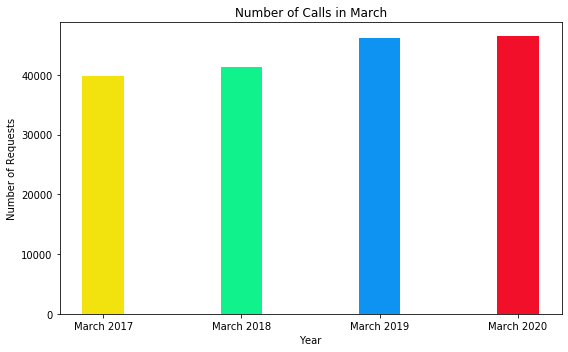

In [6]:
# Graph the Plot.bar to illustrate the change of year over year of March
plt.figure(figsize=[8, 5])

x_labels = ['March 2017', 'March 2018', 'March 2019', 'March 2020']

plt.bar(x_labels, march_counts, width=.3, color=('#f2e30f', '#0ff28c', '#0f93f2', '#f20f29'))

plt.xticks()
plt.title('Number of Calls in March')
plt.xlabel('Year')
plt.ylabel('Number of Requests')
plt.tight_layout()
plt.savefig("Number_of_call_by_month.png")
plt.show()

In [7]:

total_march_counts = [march_2017['Opened Month'].count().astype(int) + march_2018['Opened Month'].count().astype(int)+
                      march_2019['Opened Month'].count().astype(int)+ march_2020['Opened Month'].count().astype(int)]

total_march_counts

# ave_total_march_counts = ['total_march_counts'/4]
# ave_total_march_counts

[173921]

In [8]:
# The statistical module used to run chi square test
import scipy.stats as stats

observed = pd.Series([39814, 41378, 46257, 46472],
                     index=(['March 2017', 'March 2018', 'March 2019', 'March 2020']))

shelter_in_place = pd.DataFrame([observed]).T
shelter_in_place[1] = 43480

shelter_in_place.columns = ["observed", "expected"]
shelter_in_place


,observed,expected
March 2017,39814,43480
March 2018,41378,43480
March 2019,46257,43480
March 2020,46472,43480


In [9]:
critical_value = stats.chi2.ppf(q = 0.95, df = 3)
critical_value

7.814727903251179

In [10]:
# Run the chi square test with stats.chisquare()
stats.chisquare(shelter_in_place['observed'], shelter_in_place['expected'])

Power_divergenceResult(statistic=793.9685602575896, pvalue=8.796409002213458e-172)

### Conclusion
Since the chi-square value of 793 at a confidence level of 95% exceeds the critical value of 7.814 and statistically significant evidence at a =0.05 to show that Hypothesis is false. The Hypothesis is rejected and Null Hypothesis is accepted. 

It is more solid evident if we can wait April 2020 (full month data) to compare with same months of privous year.
